### Report on Machine Learning Project
# FAKE NEWS CLASSIFICATION
 
### Submitted By:
- Name: B Naga Padma Maanasa
- Registration Number: 12016660
- Roll Number: RK20CHA05
- School of Computer Science and Engineering
- LOVELY PROFESSIONAL UNIVERSITY
- Phagwara, Punjab.


## Introduction

- Fake news classification refers to the process of identifying and categorizing news articles or other types of media that contain intentionally misleading, false, or fabricated information. With the increasing prevalence of social media and online news sources, fake news has become a serious problem that can have far-reaching consequences. It can be used to spread misinformation, influence public opinion, and even manipulate political outcomes.

- To address this problem, researchers and experts in the field have developed a number of different techniques and tools for detecting and classifying fake news. Some of the most commonly used methods include machine learning algorithms, natural language processing, and network analysis. These techniques allow analysts to analyze the content and structure of news articles, identify patterns and features that distinguish fake from real news, and classify articles into different categories based on their level of credibility.

- However, detecting and classifying fake news is not always straightforward. One of the key challenges is the dynamic and evolving nature of the phenomenon. Fake news can take many different forms, and new techniques for spreading false information are constantly being developed. As a result, fake news classification requires ongoing research and development of new methods and approaches.

- Despite these challenges, the importance of fake news classification cannot be overstated. Fake news can have serious consequences in various areas, such as politics, public health, and security. It can spread misinformation, undermine trust in the media and other information sources, propagate biased or discriminatory views, and even be used to manipulate public opinion or behavior. By detecting and labeling fake news, we can reduce the impact of these negative effects and help people make more informed decisions based on accurate and trustworthy information.

- In addition, fake news classification can help promote a more informed and democratic society. When people have access to reliable information, they are better equipped to participate in public discourse, make informed decisions, and hold their leaders accountable. This can contribute to a more just and equitable society, where individuals are empowered to advocate for their own interests and those of their communities.

- Starting with making the model:

## Importing the Libraries

In [42]:
# Data Pre-Processing Libraries
import pandas as pd
import numpy as np 
# Data  Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
# Handling Warnings
import warnings
warnings.filterwarnings('ignore')
# Text Pre-Processing Libraries
import re
import string
string.punctuation
import spacy
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report , confusion_matrix

## Reading the Files

In [43]:
fake = pd.read_csv('Fake.csv')
real =pd.read_csv('True.csv')

In [44]:
fake = fake.head(2000)
real = real.head(2000)

## Cleaning and Pre-processing  

In [33]:
fake.shape

(2000, 5)

In [36]:
fake.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [5]:
fake.tail()

,title,text,subject,date
1995,Watch Legendary Reporter Ted Koppel Tell Hann...,"With the cool, calm authority that comes with ...",News,"March 26, 2017"
1996,Someone Just Showed What Trump Was Doing At H...,One day after Trump had his 12th golfing trip ...,News,"March 26, 2017"
1997,Trump Accidentally Makes Democrats Look Great...,Less than 24 hours after Trump claimed he woul...,News,"March 26, 2017"
1998,Kremlin Threatens Trump: Stop Leaking Like A ...,Snitches get stitches is Kremlin s message t...,News,"March 26, 2017"
1999,"Republicans Turn On Trump, Throw Him Under Th...",When Republicans celebrated Donald Trump s und...,News,"March 25, 2017"


In [37]:
real.shape

(1989, 5)

In [6]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
real.tail()

,title,text,subject,date
1995,Trump rescinds Obama limits on transfer of mil...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 28, 2017"
1996,Lawmakers should OK relief for Harvey victims:...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"August 28, 2017"
1997,Energy Secretary Perry cancels Kazakhstan visi...,ALMATY (Reuters) - United States Energy Secret...,politicsNews,"August 28, 2017"
1998,Trump's firm sought Moscow real estate deal du...,WASHINGTON (Reuters) - Donald Trump’s company ...,politicsNews,"August 28, 2017"
1999,Trump renews threat to scrap NAFTA going into ...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 27, 2017"


In [8]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    2000 non-null   object
 1   text     2000 non-null   object
 2   subject  2000 non-null   object
 3   date     2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


In [9]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    2000 non-null   object
 1   text     2000 non-null   object
 2   subject  2000 non-null   object
 3   date     2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


In [10]:
fake.duplicated().sum()

0

In [12]:
real.duplicated().sum()

11

In [13]:
real.drop_duplicates(inplace=True)

### Creating a new  column Category 

In [45]:
real['category'] = 0
fake['category'] = 1

- Cateogry helps us to understand wether the news is real or fake where real is represented with 0 and fake is 1.

## Creating a new data set cobining both the datsets

In [46]:
news = pd.concat([real,fake],axis=0,ignore_index=True)
# previewing the new dataset
news.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [16]:
news.tail()

,title,text,subject,date,category
3984,Watch Legendary Reporter Ted Koppel Tell Hann...,"With the cool, calm authority that comes with ...",News,"March 26, 2017",1
3985,Someone Just Showed What Trump Was Doing At H...,One day after Trump had his 12th golfing trip ...,News,"March 26, 2017",1
3986,Trump Accidentally Makes Democrats Look Great...,Less than 24 hours after Trump claimed he woul...,News,"March 26, 2017",1
3987,Kremlin Threatens Trump: Stop Leaking Like A ...,Snitches get stitches is Kremlin s message t...,News,"March 26, 2017",1
3988,"Republicans Turn On Trump, Throw Him Under Th...",When Republicans celebrated Donald Trump s und...,News,"March 25, 2017",1


In [17]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     3989 non-null   object
 1   text      3989 non-null   object
 2   subject   3989 non-null   object
 3   date      3989 non-null   object
 4   category  3989 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 155.9+ KB


In [18]:
news.columns

Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')

In [19]:
# Dropping columns not to be used
news.drop(['title','subject','date'],axis=1,inplace=True)
# Removing all punctuations
import re
news['text'] = news['text'].map(lambda x: re.sub('[-,\.!?]', '', x))
# Converting the text data to lower case
news['text'] = news['text'].map(lambda x: x.lower())

#### Creating a word cloud

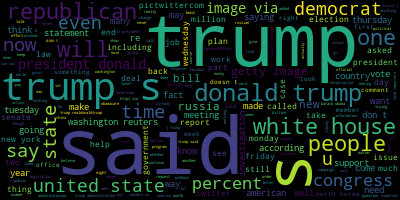

In [20]:
# Joining the different processed titles together.
long_string = ' '.join(news['text'])

# Creating a WordCloud object
wordcloud = WordCloud()

# Generating a word cloud
wordcloud.generate(long_string)

# Visualizing the word cloud
wordcloud.to_image()

In [38]:
# loading the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    # Parsing the text with Spacy
    doc = nlp(text)
    
    # Lemmatizing the tokens and remove stop words
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    
    # Joining the lemmas back into a string and return it
    return " ".join(lemmas)

# applying the preprocess_text function to the text column
news['text'] = news['text'].apply(preprocess_text)

### Splitting the data into testing and training data.

In [22]:
# Loading splitting library
from sklearn.model_selection import train_test_split

# Defining the independent variable
X = news['text']

# Defining the dependent variable
y = news['category']

# Splitting the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=2)

In [23]:
#X_train = X_train.reshape(-1)
X_train.shape

(3191,)

In [24]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(798,)
(3191,)
(3191,)
(798,)


In [25]:
# tf idf

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.01,ngram_range=(1,3))
vectorizer.fit(X_train)

X_train_vect = vectorizer.transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [27]:
type(X_train_vect)
X_test_vect.shape
X_train_vect.shape

(3191, 3341)

## Modeling the Data

In [28]:
# Instantiating logistic regression
logreg = LogisticRegression(random_state = 42,)
logreg.fit(X_train_vect,y_train)

# Predicting the value of y_train using the model
y_pred_train = logreg.predict(X_train_vect)

# Predicting the value of y_test using the model
y_pred_test = logreg.predict(X_test_vect)


# Accuracy of the training and testing data
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
print(f'Train accuracy - {train_accuracy} \nTest accuracy - {test_accuracy}')

Train accuracy - 0.9971795675336885 
Test accuracy - 0.9912280701754386


In [29]:
CM = confusion_matrix(y_test, y_pred_test)
print(CM)

[[394   3]
 [  4 397]]


<AxesSubplot:>

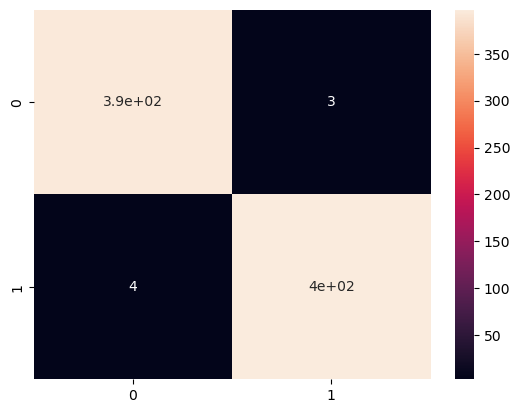

In [30]:
sns.heatmap(CM, annot=True)

In [31]:
# Classification report for training data
categories=['real','fake']
print(classification_report(y_train,y_pred_train,target_names=categories,digits=4))

              precision    recall  f1-score   support

        real     0.9969    0.9975    0.9972      1592
        fake     0.9975    0.9969    0.9972      1599

    accuracy                         0.9972      3191
   macro avg     0.9972    0.9972    0.9972      3191
weighted avg     0.9972    0.9972    0.9972      3191



In [32]:
# Classification report for testing data
print(classification_report(y_test,y_pred_test,target_names=categories,digits=4))

              precision    recall  f1-score   support

        real     0.9899    0.9924    0.9912       397
        fake     0.9925    0.9900    0.9913       401

    accuracy                         0.9912       798
   macro avg     0.9912    0.9912    0.9912       798
weighted avg     0.9912    0.9912    0.9912       798



# **Conclusion**

Overall, the field of fake news classification is constantly evolving, as researchers and experts work to develop new and more effective methods for detecting and classifying fake news. By continuing to invest in this field, we can help combat the spread of fake news and promote a more informed and democratic society that values accuracy, transparency, and accountability. After analyzing the model's performance, it can be concluded that it displays 99% accuracy rate.